enter symbolIFCI


,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
239,2019-10-07,6.9,6.90,7.00,6.80,6.80,6.80,6.89,649430,4.471813e+11,1104,302534,0.4658
240,2019-10-09,6.8,6.80,6.95,6.75,6.85,6.80,6.83,799662,5.460228e+11,1460,508858,0.6363
241,2019-10-10,6.8,6.90,6.90,6.55,6.55,6.60,6.67,1000036,6.672173e+11,1745,619766,0.6197
242,2019-10-11,6.6,6.60,6.70,6.35,6.40,6.40,6.49,1152514,7.482278e+11,1828,787130,0.6830
243,2019-10-14,6.4,6.55,6.65,6.40,6.55,6.45,6.51,899555,5.852372e+11,6215,559749,0.6223


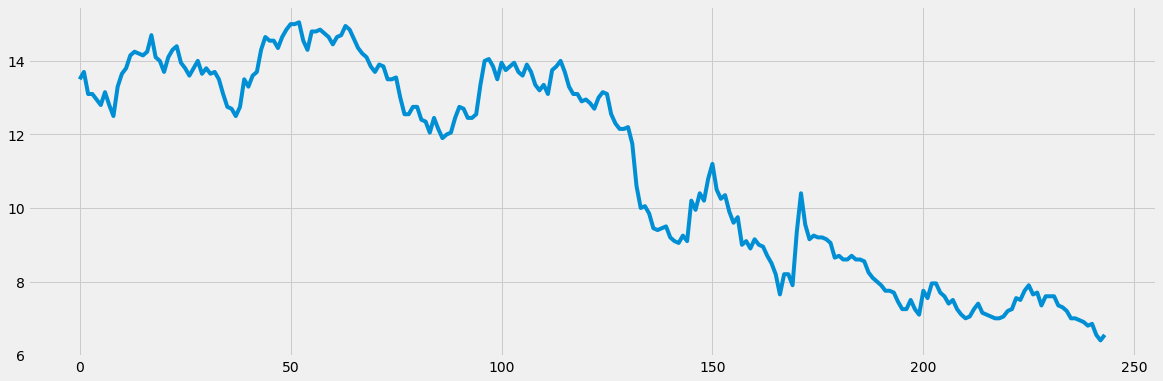

In [41]:
from nsepy import get_history
from datetime import datetime
import dateutil.relativedelta
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

end1 = datetime.now()
start1 = datetime(end1.year-1,end1.month,end1.day)


ticker = input('enter symbol')
data=get_history(symbol=ticker,start=start1,end=end1)

#data['Close'].plot()
#plt.show()


data.reset_index(level=0, inplace=True)
data = data.drop(columns=['Symbol','Series'])

plt.figure(figsize=(18,6))
plt.plot(data['Last'])


data.tail()

In [42]:
data = data.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Last'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Last'][i] = data['Last'][i]

In [43]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [44]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [45]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:190,:]
valid = dataset[190:,:]

In [46]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

C:\Users\Nihal Patel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [47]:
scaled_data.shape

(244, 1)

In [48]:
import numpy as np
x_train, y_train = [], []
for i in range(70,len(train)):
    x_train.append(scaled_data[i-70:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [49]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [50]:
x_train.shape

(120, 70, 1)

In [51]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 14s - loss: 0.0291


In [52]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 70:].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs  = scaler.transform(inputs)

(124, 1)
(124, 1)


In [53]:
inputs.shape

(124, 1)

In [54]:
X_test = []
for i in range(70,inputs.shape[0]):
    X_test.append(inputs[i-70:i,0])
X_test = np.array(X_test)
X_test.shape

(54, 70)

In [55]:
inputs_future = inputs[54:125]
inputs_future
inputs_future.shape
inputs_future = inputs_future.reshape(-1,1)
inputs_future.shape

(70, 1)

In [56]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
X_test.shape

(54, 70, 1)

In [57]:
closing_price.shape

(54, 1)

In [58]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

0.52192546264004713

In [59]:
closing_price_future = []
X_future_list = []
for i in range(70,inputs.shape[0]):
        X_future = inputs_future[i-70:i,0]
        print(inputs_future.shape)
        X_future_list.append(X_future)
        X_future = np.array(X_future)
        X_future = np.reshape(X_future,(1,70,1))
        Cl_future = model.predict(X_future)
        
        inputs_future = np.append(inputs_future,Cl_future)
        inputs_future = inputs_future.reshape(-1,1)
        print(inputs_future.shape)
        pre_close = scaler.inverse_transform(Cl_future)
        closing_price_future.append(pre_close)    

(70, 1)
(71, 1)
(71, 1)
(72, 1)
(72, 1)
(73, 1)
(73, 1)
(74, 1)
(74, 1)
(75, 1)
(75, 1)
(76, 1)
(76, 1)
(77, 1)
(77, 1)
(78, 1)
(78, 1)
(79, 1)
(79, 1)
(80, 1)
(80, 1)
(81, 1)
(81, 1)
(82, 1)
(82, 1)
(83, 1)
(83, 1)
(84, 1)
(84, 1)
(85, 1)
(85, 1)
(86, 1)
(86, 1)
(87, 1)
(87, 1)
(88, 1)
(88, 1)
(89, 1)
(89, 1)
(90, 1)
(90, 1)
(91, 1)
(91, 1)
(92, 1)
(92, 1)
(93, 1)
(93, 1)
(94, 1)
(94, 1)
(95, 1)
(95, 1)
(96, 1)
(96, 1)
(97, 1)
(97, 1)
(98, 1)
(98, 1)
(99, 1)
(99, 1)
(100, 1)
(100, 1)
(101, 1)
(101, 1)
(102, 1)
(102, 1)
(103, 1)
(103, 1)
(104, 1)
(104, 1)
(105, 1)
(105, 1)
(106, 1)
(106, 1)
(107, 1)
(107, 1)
(108, 1)
(108, 1)
(109, 1)
(109, 1)
(110, 1)
(110, 1)
(111, 1)
(111, 1)
(112, 1)
(112, 1)
(113, 1)
(113, 1)
(114, 1)
(114, 1)
(115, 1)
(115, 1)
(116, 1)
(116, 1)
(117, 1)
(117, 1)
(118, 1)
(118, 1)
(119, 1)
(119, 1)
(120, 1)
(120, 1)
(121, 1)
(121, 1)
(122, 1)
(122, 1)
(123, 1)
(123, 1)
(124, 1)


In [60]:
closing_price_future

[array([[ 7.26590872]], dtype=float32),
 array([[ 7.24718666]], dtype=float32),
 array([[ 7.25366545]], dtype=float32),
 array([[ 7.27615356]], dtype=float32),
 array([[ 7.30819321]], dtype=float32),
 array([[ 7.3454237]], dtype=float32),
 array([[ 7.38501215]], dtype=float32),
 array([[ 7.42519093]], dtype=float32),
 array([[ 7.46490431]], dtype=float32),
 array([[ 7.5035615]], dtype=float32),
 array([[ 7.54085732]], dtype=float32),
 array([[ 7.57666063]], dtype=float32),
 array([[ 7.6109395]], dtype=float32),
 array([[ 7.64371634]], dtype=float32),
 array([[ 7.67503977]], dtype=float32),
 array([[ 7.70497036]], dtype=float32),
 array([[ 7.73357058]], dtype=float32),
 array([[ 7.76090574]], dtype=float32),
 array([[ 7.7870326]], dtype=float32),
 array([[ 7.81201172]], dtype=float32),
 array([[ 7.83589315]], dtype=float32),
 array([[ 7.85872984]], dtype=float32),
 array([[ 7.88056803]], dtype=float32),
 array([[ 7.90145397]], dtype=float32),
 array([[ 7.92143011]], dtype=float32),
 arr

In [ ]:
data_closing_price_future = np.asarray(closing_price_future)
data_closing_price_future  =np.squeeze(data_closing_price_future, axis=2)

#valid['Predictions'] = np.concatenate((closing_price[:,:],data_closing_price_future[:,:]))

In [ ]:
data_closing_price_future.shape

In [ ]:
#data_closing_price_future
closing_price.shape

In [ ]:
total_prediction = np.concatenate((closing_price,data_closing_price_future))

In [ ]:
total_prediction.shape

In [ ]:
#for plotting
train = new_data[:190]
valid = new_data[190:]
valid['Predictions'] = closing_price
plt.figure(figsize=(18,6))
plt.plot(train['Last'])
plt.plot(valid[['Last','Predictions']])

In [ ]:
valid

In [ ]:
end11 = datetime.now()
start11 = datetime(end11.year-1,end11.month,end11.day)


In [ ]:
end11

In [ ]:
from datetime import datetime,timedelta
numdays = 55
base = datetime.today()
date_list = [base + timedelta(days=x) for x in range(numdays)]

In [ ]:
date_list
future_date = np.asarray(date_list)


In [ ]:
future_date = pd.DataFrame(index = future_date,columns=['date'])

In [ ]:
future_date